<a href="https://colab.research.google.com/github/hgabrali/CIFAR-10-Image-Classification-A-Transfer-Learning-Approach-with-ResNet50/blob/main/notebooks/CIFAR10_ResNet50_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Image Classification: A Transfer Learning Approach with ResNet50

## 📌 Project Overview
Transitioning from the grayscale simplicity of Fashion MNIST, this project tackles the **CIFAR-10** dataset—a benchmark in computer vision consisting of 60,000 $32 \times 32$ color images across 10 mutually exclusive classes.

The primary objective was to leverage **Transfer Learning** using the **ResNet50** architecture, demonstrating the efficiency of using pre-trained weights (ImageNet) to solve complex image classification tasks even with relatively low-resolution inputs.

# **1. Setup and Repository Cloning**

In [1]:
# Clone the repository to access the src folder
!git clone https://github.com/hgabrali/CIFAR-10-Image-Classification-A-Transfer-Learning-Approach-with-ResNet50.git
%cd CIFAR-10-Image-Classification-A-Transfer-Learning-Approach-with-ResNet50

# Add the current directory to sys.path to import local modules
import sys
import os
sys.path.append(os.getcwd())

# Import our custom functions from the src directory
from src.preprocessing import prepare_data
from src.model_builder import build_transfer_learning_model

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

Cloning into 'CIFAR-10-Image-Classification-A-Transfer-Learning-Approach-with-ResNet50'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 35 (delta 9), reused 20 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 12.93 KiB | 6.47 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/CIFAR-10-Image-Classification-A-Transfer-Learning-Approach-with-ResNet50


**Step 1: Library Setup & Data Downsampling**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import cifar10

# Load full dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Downsampling to 10,000 samples for computational efficiency
# Note: This might lead to higher variance in validation metrics
subset_size = 10000
train_images = train_images[:subset_size]
train_labels = train_labels[:subset_size]

# Mapping integers to class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# **2. Loading and Preprocessing Data**

In [9]:
# Load the CIFAR-10 dataset (60,000 32x32 color images)
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Process data using our custom modular function
# This includes ResNet50 specific scaling and One-Hot Encoding
x_train, y_train, x_test, y_test = prepare_data(train_images, train_labels, test_images, test_labels)

print(f"Training data shape: {x_train.shape}") # Expected: (50000, 32, 32, 3)
print(f"Test data shape: {x_test.shape}")     # Expected: (10000, 32, 32, 3)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


**Step 2: Exploratory Data Analysis (EDA)**

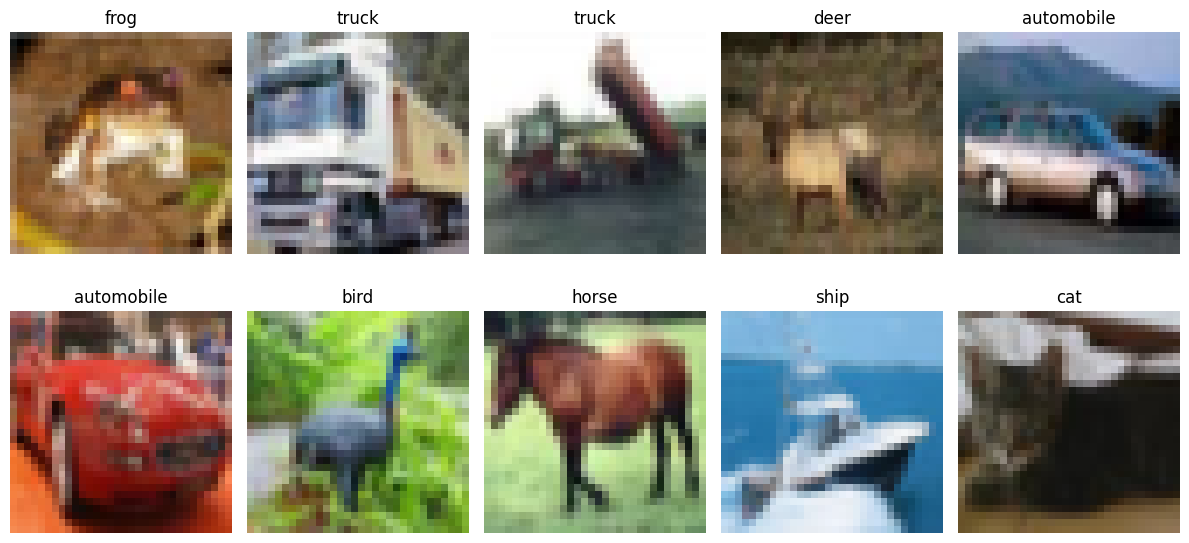

In [8]:
def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize 10 random samples to check RGB quality
plot_sample_images(train_images, train_labels, class_names)

# **3. Model Initialization (Phase 1: Frozen Base)**

In [12]:
# Assuming src functions are already imported as before
x_train, y_train, x_test, y_test = prepare_data(train_images, train_labels, test_images, test_labels)

# Initialize and train the frozen head
model = build_transfer_learning_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_head = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

# Fine-tuning: Unfreeze and train with lower learning rate
model.layers[0].trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_full = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 24ms/step - accuracy: 0.5374 - loss: 1.3866 - val_accuracy: 0.6339 - val_loss: 1.0533
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6793 - loss: 0.9144 - val_accuracy: 0.6584 - val_loss: 0.9900
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7184 - loss: 0.7986 - val_accuracy: 0.6576 - val_loss: 1.0033
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7495 - loss: 0.7159 - val_accuracy: 0.6573 - val_loss: 1.0095
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7703 - loss: 0.6451 - val_accuracy: 0.6586 - val_loss: 1.0221
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7976 - loss: 0.5740 - val_accuracy: 0.6625 - val_loss: 1.1024
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8233 - loss: 0.4965 - val_accuracy: 0.6578 - val_loss: 1.1324
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8456 - loss: 0.4346 - val_a

# **4. Training Phase 1: The Head**

**A. Training Curves Analysis**

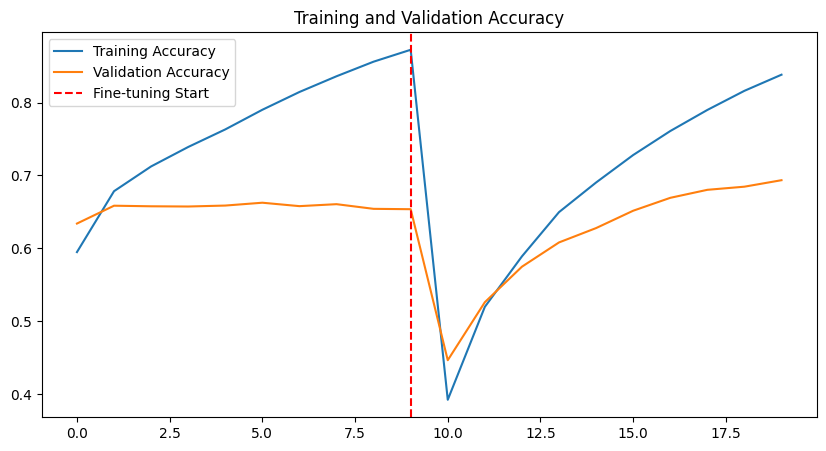

In [13]:
def plot_training_history(history1, history2):
    acc = history1.history['accuracy'] + history2.history['accuracy']
    val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']

    plt.figure(figsize=(10, 5))
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.axvline(x=9, color='r', linestyle='--', label='Fine-tuning Start')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history_head, history_full)

**B. Error Analysis & Confusion Matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step


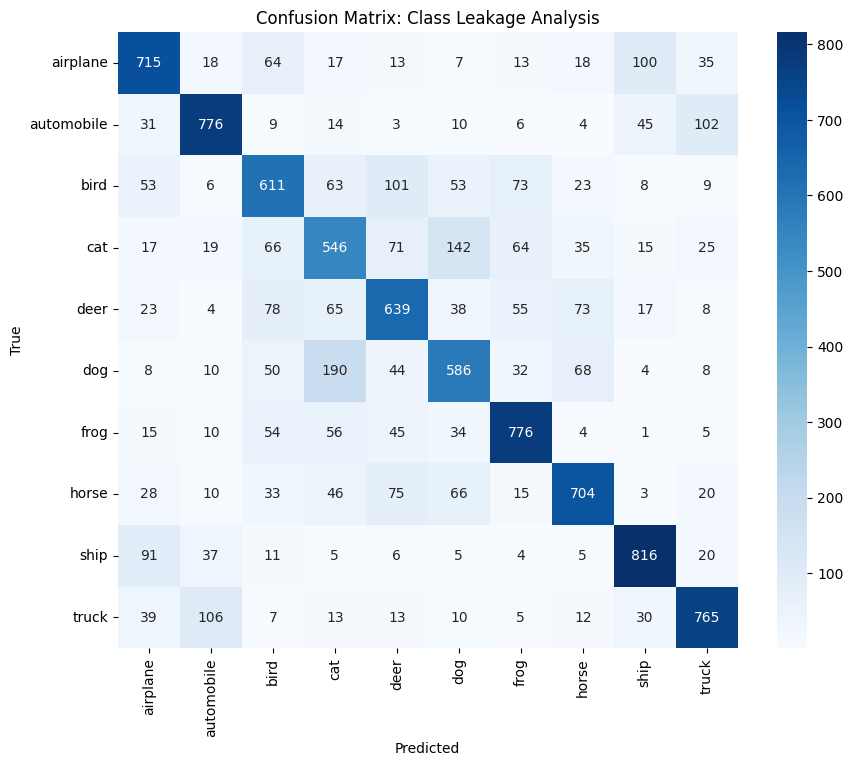


Classification Report:
               precision    recall  f1-score   support

    airplane       0.70      0.71      0.71      1000
  automobile       0.78      0.78      0.78      1000
        bird       0.62      0.61      0.62      1000
         cat       0.54      0.55      0.54      1000
        deer       0.63      0.64      0.64      1000
         dog       0.62      0.59      0.60      1000
        frog       0.74      0.78      0.76      1000
       horse       0.74      0.70      0.72      1000
        ship       0.79      0.82      0.80      1000
       truck       0.77      0.77      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [14]:
# Generate predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Class Leakage Analysis')
plt.show()

# Print F1-Score and general report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))

# **5. Training Phase 2: Fine-Tuning**

In [5]:
# Unfreeze the base model layers for fine-tuning
model.layers[0].trainable = True

# Re-compile with a lower learning rate to prevent destroying pre-trained weights
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Starting Phase 2: Fine-tuning the entire model...")
history_phase2 = model.fit(x_train, y_train,
                           epochs=10,
                           batch_size=64,
                           validation_data=(x_test, y_test))

Starting Phase 2: Fine-tuning the entire model...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 71ms/step - accuracy: 0.3479 - loss: 2.5402 - val_accuracy: 0.4530 - val_loss: 2.0461
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.5058 - loss: 1.5418 - val_accuracy: 0.5275 - val_loss: 1.5353
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.5871 - loss: 1.2191 - val_accuracy: 0.5788 - val_loss: 1.3355
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6445 - loss: 1.0309 - val_accuracy: 0.6117 - val_loss: 1.2308
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6912 - loss: 0.8912 - val_accuracy: 0.6336 - val_loss: 1.1486
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7355 - loss: 0.7704 - val_accuracy: 0.6523 - val_loss: 1.1030
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7687 - loss: 0.6658 - val_accuracy: 0.6673 - val_loss: 1.0740
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━

# **6. Final Evaluation**

In [15]:
# Evaluate the model performance on testing data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nFinal Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6961 - loss: 1.0472

Final Test Accuracy: 69.34%


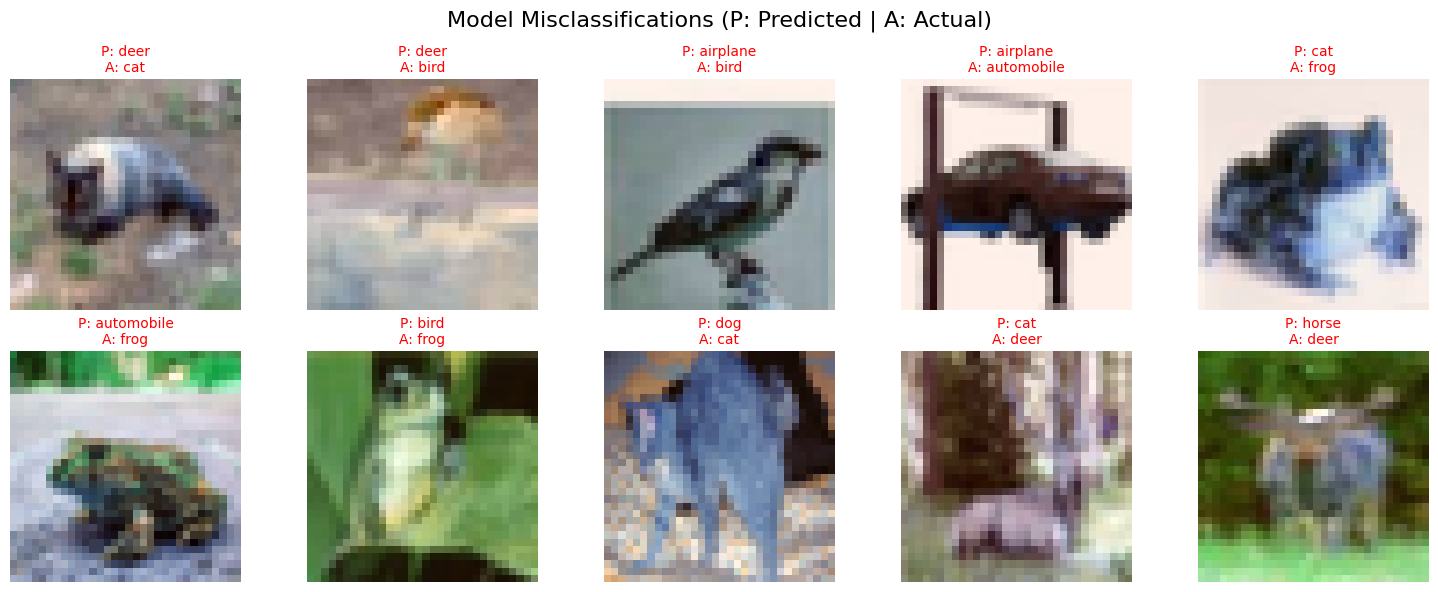

In [16]:
# Step 7: Visualizing Model Errors (Blind Spots)
def plot_misclassified_samples(x_test, y_true, y_pred, class_names, num_samples=10):
    """
    Identifies and plots samples where the model's prediction differs from the ground truth.

    Technical Reasoning:
    Visual inspection helps identify if errors are due to image quality (noise/blur),
    visual similarity (leakage), or specific lighting conditions.
    """

    # Identify the indices of misclassified images
    #
    misclassified_idx = np.where(y_pred != y_true)[0]

    # Randomly select samples from the error list
    if len(misclassified_idx) > num_samples:
        selected_idx = np.random.choice(misclassified_idx, num_samples, replace=False)
    else:
        selected_idx = misclassified_idx

    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(selected_idx):
        plt.subplot(2, 5, i + 1)

        # CIFAR-10 images are 32x32. We need to undo the ResNet50 preprocessing
        # (approximately) to make them viewable for the human eye.
        img = x_test[idx]

        # Simple normalization for visualization purposes
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        plt.title(f"P: {class_names[y_pred[idx]]}\nA: {class_names[y_true[idx]]}",
                  color='red', fontsize=10)
        plt.axis('off')

    plt.suptitle("Model Misclassifications (P: Predicted | A: Actual)", fontsize=16)
    plt.tight_layout()
    plt.show()

# Execute visualization
# Ensure y_pred_classes and y_true were defined in the previous step
plot_misclassified_samples(x_test, y_true, y_pred_classes, class_names)